# ***Cloning the dataset files***

In [1]:
!git clone https://github.com/Ahmed-Anwar-2001/Offensive-Text-Detection.git

Cloning into 'Offensive-Text-Detection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 1004.33 KiB | 3.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.


# ***Installing necesary libraries***

In [2]:
#if you find error while installing sklearn uncomment the next line and upgrade the pip setup wheel
#!pip install -U pip setuptools wheel
!pip install -U scikit-learn
#!pip install sklearn
!pip install gensim
!pip install numpy
!pip install tqdm
!pip install matplotlib

!pip install keras
!pip install wordcloud
!pip install pydot
!pip install graphviz
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00


# ***Importing necessary libraries***

In [3]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler
from keras.utils import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.models import Model
import tensorflow as tf

from warnings import filterwarnings
filterwarnings("ignore")

# ***Loading the dataset***

In [4]:
data = pd.read_csv('/content/Offensive-Text-Detection/OLID/olid-training-v1.0.tsv' , sep='\t')
data.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


# ***Description of the dataset and necessary information***

# Based on the type and target of offences, the task is categorized into 3 sub-tasks:

• **Sub-task A:** Offensive language identification
Here, the task is to differentiate between offensive and non-offensive tweets. The class labels in this sub-task are: OFF (Offensive) and NOTOFF (Non-Offensive). Any profanity, insults, violent
remarks etc. qualifies as an OFF tweet. Rest all as NOTOFF.

• **Sub-task B:** Automatic categorization of offense types
Once a tweet is known to be offensive, the next task is to detect the presence of any target entity to
whom the offence is directed. The two classes involved are: UNT (Untargeted) and TIN (Targeted).

• **Sub-task C:** Offense target identification
This task aims to find the target of offence with possible categories of IND (Individual), GRP
(GROUP) and OTH (Others). Insulting or threat *italicized text*

# ***Shape of the dataset***

In [5]:
print("Shape of the dataset => (Rows, Columns) = ",end='')
data.shape

Shape of the dataset => (Rows, Columns) = 

(13240, 5)

In [6]:
display(data.describe().style.background_gradient(cmap='coolwarm'))

,id
count,13240.000000
mean,54881.766163
std,26092.681658
min,10006.000000
25%,32235.750000
50%,54852.000000
75%,77743.250000
max,99986.000000


# ***Checking for null values***

In [7]:
data.isnull().sum()

id              0
tweet           0
subtask_a       0
subtask_b    8840
subtask_c    9364
dtype: int64

# ***Unique number of tweets and unique tags of subtask-a,b,c***

In [8]:
print(f'Total number of tweets:',len(data['tweet']))
print(f'Unique number of tweets:',len(data['tweet'].unique()))
print(f'Unique tags for subtask_a:',data['subtask_a'].unique())
print(f'Unique tags for subtask_b:',data['subtask_b'].unique())
print(f'Unique tags for subtask_c:',data['subtask_c'].unique())

Total number of tweets: 13240
Unique number of tweets: 13207
Unique tags for subtask_a: ['OFF' 'NOT']
Unique tags for subtask_b: ['UNT' 'TIN' nan]
Unique tags for subtask_c: [nan 'IND' 'OTH' 'GRP']


**Removing duplicate tweets**

In [9]:
size = len(data["tweet"])
size_uniq = len(data["tweet"].drop_duplicates())

print("Duplicates tweets =",(size - size_uniq))

Duplicates tweets = 33


In [10]:
data = data.drop_duplicates(subset='tweet')
print(f'Total number of tweets:',len(data['tweet']))
print(f'Unique number of tweets:',len(data['tweet'].unique()))
print(f'Unique tags for subtask_a:',data['subtask_a'].unique())
print(f'Unique tags for subtask_b:',data['subtask_b'].unique())
print(f'Unique tags for subtask_c:',data['subtask_c'].unique())

Total number of tweets: 13207
Unique number of tweets: 13207
Unique tags for subtask_a: ['OFF' 'NOT']
Unique tags for subtask_b: ['UNT' 'TIN' nan]
Unique tags for subtask_c: [nan 'IND' 'OTH' 'GRP']


# ***Small, Average and Large tweet length and count***

In [11]:
length = 0
count = 0
max = 0
min = 99999999999999999999999999999
for i in data['tweet']:
  length+=len(str(i).split(" "))
  if len(str(i).split(" "))>max:
    max = len(str(i).split(" "))
  if len(str(i).split(" "))<min:
    min = len(str(i).split(" "))
  count+=1
average = length//count
print('Smallest tweet length =',min)
print('Largest tweet length =',max)
print('Average tweet length =',average)

Smallest tweet length = 2
Largest tweet length = 103
Average tweet length = 22


In [12]:
small = 0
large = 0
avg = 0
for i in data['tweet']:
  l = len(str(i).split(" "))
  if 16<=l<=28:
    avg+=1
  elif l>average:
    large+=1
  else:
    small+=1

print('Smallest tweet count =',small)
print('Largest tweet count =',large)
print('Average tweet count =',avg)

Smallest tweet count = 5539
Largest tweet count = 4112
Average tweet count = 3556


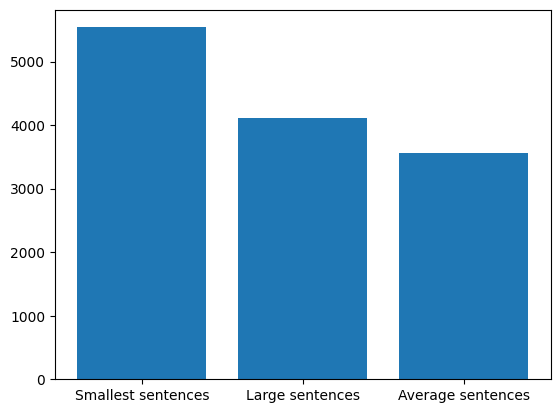

In [13]:
data1 = {'Smallest sentences':small,'Large sentences':large,'Average sentences':avg}
names = list(data1.keys())
values = list(data1.values())

plt.bar(range(len(data1)), values, tick_label=names)
plt.show()


# ***Offensive and Not Offensive texts Count [Subtask-a]***

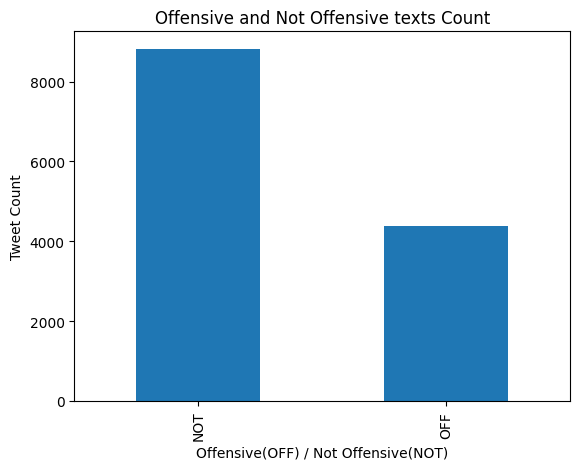

<Axes: ylabel='subtask_a'>

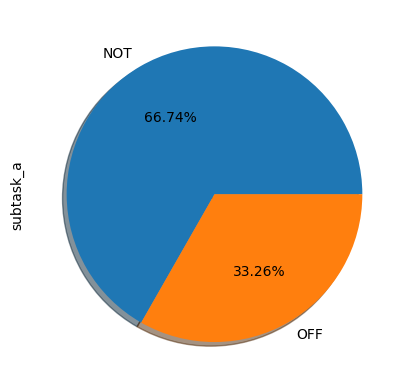

In [14]:
dataplot_a = data['subtask_a'].value_counts()

import matplotlib.font_manager as fm
dataplot_a.plot(kind='bar')
plt.xlabel('Offensive(OFF) / Not Offensive(NOT)')
plt.ylabel('Tweet Count')
plt.title('Offensive and Not Offensive texts Count')
plt.show()


print('=============================================================================================')

data["subtask_a"].value_counts().plot(kind="pie",autopct='%.2f%%',
    shadow=True)

# ***Untargeted and Targeted Offensive texts Count [Subtask-b]***

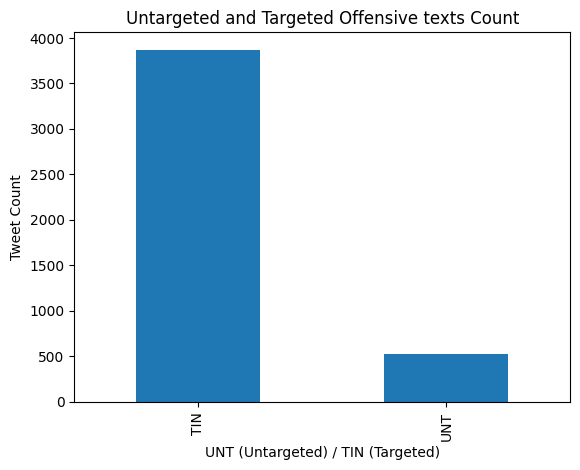

<Axes: ylabel='subtask_b'>

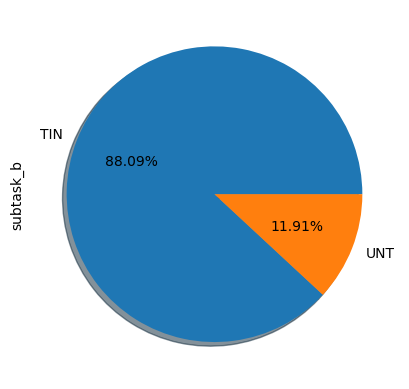

In [15]:
dataplot_b = data['subtask_b'].value_counts()

import matplotlib.font_manager as fm
dataplot_b.plot(kind='bar')
plt.xlabel('UNT (Untargeted) / TIN (Targeted)')
plt.ylabel('Tweet Count')
plt.title('Untargeted and Targeted Offensive texts Count')
plt.show()


print('=============================================================================================')

data["subtask_b"].value_counts().plot(kind="pie",autopct='%.2f%%',
    shadow=True)

# ***Targets of the offense [Subtask-c]***

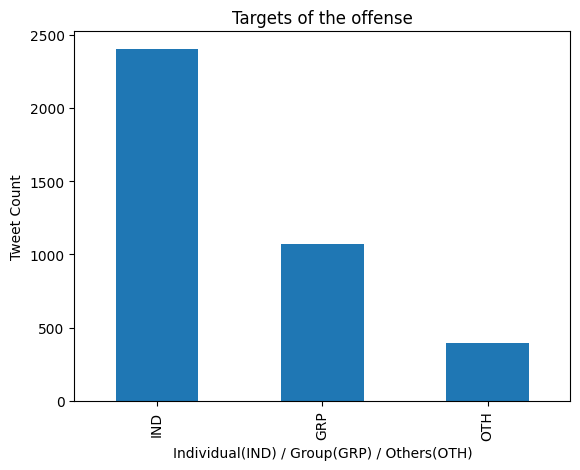

<Axes: ylabel='subtask_c'>

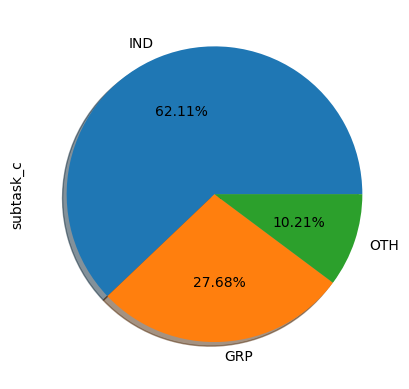

In [16]:
dataplot_c = data['subtask_c'].value_counts()

import matplotlib.font_manager as fm
dataplot_c.plot(kind='bar')
plt.xlabel('Individual(IND) / Group(GRP) / Others(OTH)')
plt.ylabel('Tweet Count')
plt.title('Targets of the offense')
plt.show()

print('=============================================================================================')

data["subtask_c"].value_counts().plot(kind="pie",autopct='%.2f%%',
    shadow=True)

# ***Preparing our test and train data***

In [17]:
train_data=pd.read_csv('/content/Offensive-Text-Detection/OLID/olid-training-v1.0.tsv', delimiter='\t', encoding='utf-8')
train_data = data.drop_duplicates(subset='tweet')
train_data.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


**Cleaning the tweets**

In [18]:
def clean_tweets(df):

    punctuations = string.punctuation

    df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '') #Remove mentions (@USER)
    df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '') #Remove URLs
    df.loc[:, 'tweet'] = df.tweet.str.replace('&amp', 'and') #Replace ampersand (&) with and
    df.loc[:, 'tweet'] = df.tweet.str.replace('&lt','') #Remove &lt
    df.loc[:, 'tweet'] = df.tweet.str.replace('&gt','') #Remove &gt
    df.loc[:, 'tweet'] = df.tweet.str.replace('\d+','') #Remove numbers
    df.loc[:, 'tweet'] = df.tweet.str.lower() #Lowercase

    #Remove punctuations
    for punctuation in punctuations:
        df.loc[:, 'tweet'] = df.tweet.str.replace(punctuation, '')

    df.loc[:, 'tweet'] = df.astype(str).apply(
        lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
    )
    #Remove emojis
    df.loc[:, 'tweet'] = df.tweet.str.strip() #Trim leading and trailing whitespaces
clean_tweets(train_data)
train_data.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,she should ask a few native americans what the...,OFF,UNT,NaN
1,90194,go home youre drunk maga trump,OFF,TIN,IND
2,16820,amazon is investigating chinese employees who ...,NOT,NaN,NaN
3,62688,someone shouldvetaken this piece of shit to a ...,OFF,UNT,NaN
4,43605,obama wanted liberals and illegals to move int...,NOT,NaN,NaN


# **Train Data**

In [19]:
train_tweets = train_data[['tweet']] #Extract tweets
train_task_a_labels= train_data[['subtask_a']] #Extract subtsak_a labels
train_task_b_labels= train_data[['subtask_b']] #Extract subtsak_b labels
train_task_c_labels= train_data[['subtask_c']] #Extract subtsak_c labels

train_task_a_labels.columns.values[0] = 'class_a' #Rename class attribute
train_task_b_labels.columns.values[0] = 'class_b' #Rename class attribute
train_task_c_labels.columns.values[0] = 'class_c' #Rename class attribute


In [20]:
train_task_a_data = train_tweets.join(train_task_a_labels)

train_task_b_data = train_tweets.join(train_task_b_labels)
train_task_b_data = train_task_b_data.dropna() #Drop records with missing values

train_task_c_data = train_tweets.join(train_task_c_labels)
train_task_c_data = train_task_c_data.dropna() #Drop records with missing values

#Apply quotes to cleaned tweets
train_task_a_data.update(train_task_a_data[['tweet']].applymap('\'{}\''.format))
train_task_b_data.update(train_task_b_data[['tweet']].applymap('\'{}\''.format))
train_task_c_data.update(train_task_c_data[['tweet']].applymap('\'{}\''.format))

# **Test Data**

In [21]:
#Read tweets from test sets
test_tweet_a=pd.read_csv('/content/Offensive-Text-Detection/OLID/testset-levela.tsv', delimiter='\t', encoding='utf-8')
test_tweet_b=pd.read_csv('/content/Offensive-Text-Detection/OLID/testset-levelb.tsv', delimiter='\t', encoding='utf-8')
test_tweet_c=pd.read_csv('/content/Offensive-Text-Detection/OLID/testset-levelc.tsv', delimiter='\t', encoding='utf-8')

#Read tweet labels
test_label_a=pd.read_csv('/content/Offensive-Text-Detection/OLID/labels-levela.csv', encoding='utf-8',
                         index_col=False, names=['id', 'class_a'])
test_label_b=pd.read_csv('/content/Offensive-Text-Detection/OLID/labels-levelb.csv', encoding='utf-8',
                         index_col=False, names=['id', 'class_b'])
test_label_c=pd.read_csv('/content/Offensive-Text-Detection/OLID/labels-levelc.csv', encoding='utf-8',
                         index_col=False, names=['id', 'class_c'])

#Merge tweets with labels by id
test_tweet_a = test_tweet_a.merge(test_label_a, on='id')
test_tweet_b = test_tweet_b.merge(test_label_b, on='id')
test_tweet_c = test_tweet_c.merge(test_label_c, on='id')

#Drop id column
test_tweet_a = test_tweet_a.drop(columns='id')
test_tweet_b = test_tweet_b.drop(columns='id')
test_tweet_c = test_tweet_c.drop(columns='id')

#Clean tweets in test sets
clean_tweets(test_tweet_a)
clean_tweets(test_tweet_b)
clean_tweets(test_tweet_c)

#Apply quotes to cleaned tweets
test_tweet_a.update(test_tweet_a[['tweet']].applymap('\'{}\''.format))
test_tweet_b.update(test_tweet_b[['tweet']].applymap('\'{}\''.format))
test_tweet_c.update(test_tweet_c[['tweet']].applymap('\'{}\''.format))

test_tweet_a.head()

,tweet,class_a
0,'whoisq wherestheserver dumpnike declasfisa de...,OFF
1,'constitutionday is revered by conservatives h...,NOT
2,'foxnews nra maga potus trump ndamendment rnc ...,NOT
3,'watching boomer getting the news that she is ...,NOT
4,'nopasaran unity demo to oppose the farright i...,OFF


# ***Subtask-A***

In [22]:
# Creating labelEncoder
encoder = LabelEncoder()
# Converting string labels into numbers.
train_task_a_data["class_a_code"] = encoder.fit_transform(train_task_a_data["class_a"])
test_tweet_a["class_a_code"] = encoder.fit_transform(test_tweet_a["class_a"])

In [23]:
#Create tuple pair for class and class code
train_task_a_data['class-tuple'] = train_task_a_data[['class_a', 'class_a_code']].apply(tuple, axis=1)
class_a = train_task_a_data['class-tuple'].unique()
class_a

array([('OFF', 1), ('NOT', 0)], dtype=object)

In [24]:
# Label the Data

train_tweets = train_task_a_data['tweet']
train_labels = train_task_a_data['class_a']

test_tweets = test_tweet_a['tweet']
test_labels = test_tweet_a['class_a']


print("Shape of train_tweet is {} and shape of train_label is {}".format(train_tweets.shape, train_labels.shape))
print("Shape of test_tweet is {} and shape of test_label is {}".format(test_tweets.shape, test_labels.shape))

Shape of train_tweet is (13207,) and shape of train_label is (13207,)
Shape of test_tweet is (860,) and shape of test_label is (860,)


***Splitting Dataset =>***


In [25]:

train_tweets = train_task_a_data['tweet']
train_labels = train_task_a_data['class_a_code']

X_test = test_tweet_a['tweet']
y_test = test_tweet_a['class_a_code']


print("Shape of train_tweet is {} and shape of train_label is {}".format(train_tweets.shape, train_labels.shape))
print("Shape of test_tweet is {} and shape of test_label is {}".format(X_test.shape, y_test.shape))

Shape of train_tweet is (13207,) and shape of train_label is (13207,)
Shape of test_tweet is (860,) and shape of test_label is (860,)


In [26]:
X_train,X_val,y_train,y_val = train_test_split(train_tweets,train_labels,test_size=0.30,random_state=42)

print("Shape of train_tweets is {} and shape of train_labels is {}".format(X_train.shape, y_train.shape))
print("Shape of test_tweets is {} and shape of test_labels is {}".format(X_test.shape, y_test.shape))

Shape of train_tweets is (9244,) and shape of train_labels is (9244,)
Shape of test_tweets is (860,) and shape of test_labels is (860,)


In [27]:
# TOKENIZER
max_features = 10000
embedding_dim = 128
max_len=500

tokenizer=Tokenizer(num_words=max_features,oov_token='</OOV>')
tokenizer.fit_on_texts(X_train.values)
dic=tokenizer.word_index
#print(dic)

In [28]:
# TRAIN
X_train_seq = tokenizer.texts_to_sequences(X_train.values)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)

print("train data tensor:" ,X_train_pad.shape)

train data tensor: (9244, 500)


In [29]:
# VAL
X_val_seq = tokenizer.texts_to_sequences(X_val.values)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

print("test data tensor:" ,X_val_pad.shape)

test data tensor: (3963, 500)


In [30]:
# TEST
X_test_seq = tokenizer.texts_to_sequences(X_test.values)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

print("test data tensor:" ,X_test_pad.shape)

test data tensor: (860, 500)


# ***Building Our Bidirectional LSTM Model***

In [31]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

In [32]:
model= Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=max_len))
model.add(Bidirectional(LSTM(128, dropout=0.3)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainable params: 1,576,193
Non-trainable params: 0
______________________________________________

In [34]:
import tensorflow as tf
METRICS = [tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")]


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=METRICS)

# ***Training the Model***

In [35]:
epochs = 10

# Fit the model using the train and test datasets.
history = model.fit(X_train_pad,y_train,validation_data=(X_val_pad,y_val), epochs=epochs)

Epoch 1/10
289/289 [==============================] - 68s 174ms/step - loss: 0.6119 - binary_accuracy: 0.6830 - precision: 0.6332 - recall: 0.1397 - val_loss: 0.5502 - val_binary_accuracy: 0.7335 - val_precision: 0.7740 - val_recall: 0.2463
Epoch 2/10
289/289 [==============================] - 19s 65ms/step - loss: 0.4349 - binary_accuracy: 0.8072 - precision: 0.7667 - recall: 0.6145 - val_loss: 0.5564 - val_binary_accuracy: 0.7323 - val_precision: 0.5946 - val_recall: 0.5356
Epoch 3/10
289/289 [==============================] - 15s 52ms/step - loss: 0.3039 - binary_accuracy: 0.8762 - precision: 0.8366 - recall: 0.7861 - val_loss: 0.6384 - val_binary_accuracy: 0.7207 - val_precision: 0.5708 - val_recall: 0.5418
Epoch 4/10
289/289 [==============================] - 14s 49ms/step - loss: 0.2013 - binary_accuracy: 0.9240 - precision: 0.8982 - recall: 0.8731 - val_loss: 0.8359 - val_binary_accuracy: 0.6929 - val_precision: 0.5219 - val_recall: 0.5770
Epoch 5/10
289/289 [===================

Model image saved as 'model.png'


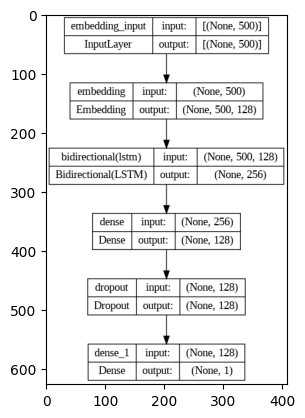

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

print("Model image saved as 'model.png'")
img = plt.imread('/content/model_plot.png')
plt.imshow(img)

In [37]:
scores = model.evaluate(X_test_pad, y_test, return_dict=True)

print(scores)

27/27 [==============================] - 1s 22ms/step - loss: 1.4518 - binary_accuracy: 0.7442 - precision: 0.5403 - recall: 0.5583
{'loss': 1.4518390893936157, 'binary_accuracy': 0.7441860437393188, 'precision': 0.5403226017951965, 'recall': 0.5583333373069763}


In [38]:
y_pred = model.predict(X_test_pad)

27/27 [==============================] - 1s 17ms/step


In [39]:
for i in range(len(y_pred)):
    if(y_pred[i] > 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0

# ***Accuracy report=> (Precision, Recall, F1-score)***

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       620
           1       0.54      0.56      0.55       240

    accuracy                           0.74       860
   macro avg       0.68      0.69      0.69       860
weighted avg       0.75      0.74      0.75       860



# ***Confusion Matrx***

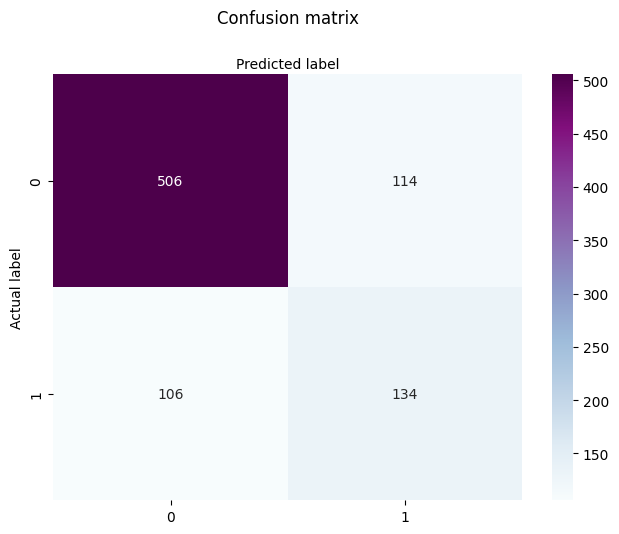

In [41]:
def plot_conf_matrix(test_label,predicted_label):
    cm = confusion_matrix(test_label,predicted_label)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');

plot_conf_matrix(y_test,y_pred)

# ***Using BERT embeddings***

In [42]:
import torch
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Example text data

def embeddings(text):
    # Tokenize the text
    tokens = tokenizer(text, return_tensors="pt")

    # Forward pass through the model to get embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Get the embeddings for the [CLS] token (usually used for classification)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # The 'embeddings' variable now contains the BERT embeddings for the input text
    return embeddings


In [43]:
demo_train = []
for i in X_train:
  e = embeddings(i)
  demo_train.append(e)

In [44]:
demo_test = []
for i in X_test:
  e = embeddings(i)
  demo_test.append(e)

In [45]:
# demo_val = []
# for i in X_val:

#   e = embeddings(i)
#   demo_val.append(e)
print()

# ***SVC***

In [46]:
from sklearn.svm import SVC
#creating obj of model
model_svm = SVC(kernel='rbf')

In [47]:
#model training svm
model_svm.fit(demo_train,y_train)

SVC()

In [48]:
pred_svm = model_svm.predict(demo_test)

In [49]:
for i in range(len(pred_svm)):
    if(pred_svm[i] > 0.5):
        pred_svm[i] = 1
    else:
        pred_svm[i] =0

In [50]:
accuracy_score_svm = accuracy_score(y_test,pred_svm) #svm accuracy score
print("Accuracy: ",accuracy_score_svm*100)

Accuracy:  82.09302325581396


In [51]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       620
           1       0.80      0.48      0.60       240

    accuracy                           0.82       860
   macro avg       0.81      0.72      0.74       860
weighted avg       0.82      0.82      0.80       860



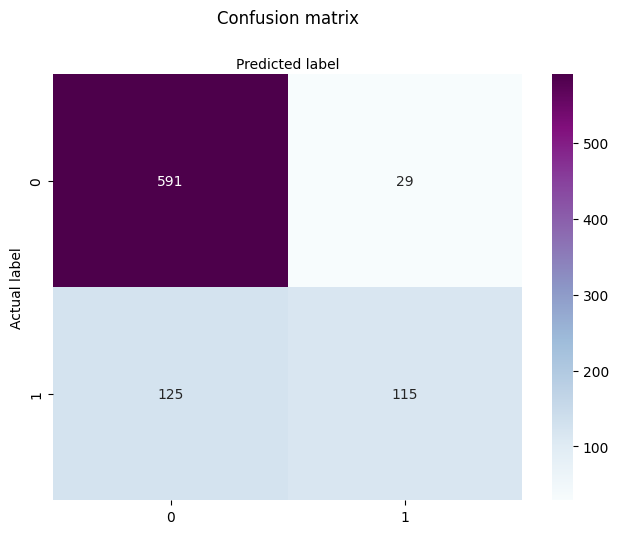

In [52]:
plot_conf_matrix(y_test,pred_svm)

# ***Logistic Regression***

In [53]:
from sklearn.linear_model import LogisticRegression
X = demo_train
y = y_train

clf = LogisticRegression(max_iter=9000,random_state=0).fit(X, y)

In [54]:
pred_logistic = clf.predict(demo_test)

In [55]:
for i in range(len(pred_logistic)):
    if(pred_logistic[i] > 0.5):
        pred_logistic[i] = 1
    else:
        pred_logistic[i] =0

In [56]:
print(classification_report(y_test,pred_logistic))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       620
           1       0.74      0.51      0.61       240

    accuracy                           0.81       860
   macro avg       0.79      0.72      0.74       860
weighted avg       0.81      0.81      0.80       860



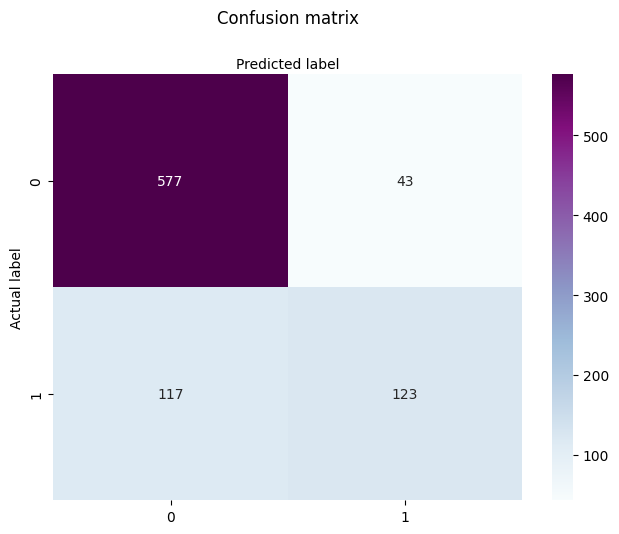

In [57]:
plot_conf_matrix(y_test,pred_logistic)

# ***Subtask B***

In [58]:
# Creating labelEncoder
encoder = LabelEncoder()
# Converting string labels into numbers.
train_task_b_data["class_b_code"] = encoder.fit_transform(train_task_b_data["class_b"])
test_tweet_b["class_b_code"] = encoder.fit_transform(test_tweet_b["class_b"])

In [59]:
#Create tuple pair for class and class code
train_task_b_data['class-tuple'] = train_task_b_data[['class_b', 'class_b_code']].apply(tuple, axis=1)
class_b = train_task_b_data['class-tuple'].unique()
class_b

array([('UNT', 1), ('TIN', 0)], dtype=object)

In [60]:
# Label the Data

train_tweets = train_task_b_data['tweet']
train_labels = train_task_b_data['class_b']

test_tweets = test_tweet_b['tweet']
test_labels = test_tweet_b['class_b']


print("Shape of train_tweet is {} and shape of train_label is {}".format(train_tweets.shape, train_labels.shape))
print("Shape of test_tweet is {} and shape of test_label is {}".format(test_tweets.shape, test_labels.shape))

Shape of train_tweet is (4392,) and shape of train_label is (4392,)
Shape of test_tweet is (240,) and shape of test_label is (240,)


In [61]:

train_tweets = train_task_b_data['tweet']
train_labels = train_task_b_data['class_b_code']

X_test = test_tweet_b['tweet']
y_test = test_tweet_b['class_b_code']


print("Shape of train_tweet is {} and shape of train_label is {}".format(train_tweets.shape, train_labels.shape))
print("Shape of test_tweet is {} and shape of test_label is {}".format(X_test.shape, y_test.shape))

Shape of train_tweet is (4392,) and shape of train_label is (4392,)
Shape of test_tweet is (240,) and shape of test_label is (240,)


In [62]:
X_train,X_val,y_train,y_val = train_test_split(train_tweets,train_labels,test_size=0.30,random_state=42)

print("Shape of train_tweets is {} and shape of train_labels is {}".format(X_train.shape, y_train.shape))
print("Shape of test_tweets is {} and shape of test_labels is {}".format(X_test.shape, y_test.shape))

Shape of train_tweets is (3074,) and shape of train_labels is (3074,)
Shape of test_tweets is (240,) and shape of test_labels is (240,)


In [63]:
# TOKENIZER
max_features = 10000
embedding_dim = 128
max_len=500

tokenizer=Tokenizer(num_words=max_features,oov_token='</OOV>')
tokenizer.fit_on_texts(X_train.values)
dic=tokenizer.word_index
#print(dic)

In [64]:
# TRAIN
X_train_seq = tokenizer.texts_to_sequences(X_train.values)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)

print("train data tensor:" ,X_train_pad.shape)

train data tensor: (3074, 500)


In [65]:
# VAL
X_val_seq = tokenizer.texts_to_sequences(X_val.values)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

print("test data tensor:" ,X_val_pad.shape)

test data tensor: (1318, 500)


In [66]:
# TEST
X_test_seq = tokenizer.texts_to_sequences(X_test.values)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

print("test data tensor:" ,X_test_pad.shape)

test data tensor: (240, 500)


# ***Building Our Bidirectional LSTM Model***

In [67]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

In [68]:
model= Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=max_len))
model.add(Bidirectional(LSTM(128, dropout=0.3)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainable params: 1,576,193
Non-trainable params: 0
____________________________________________

In [70]:
import tensorflow as tf
METRICS = [tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")]


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=METRICS)

In [71]:
epochs = 10

# Fit the model using the train and test datasets.
history = model.fit(X_train_pad,y_train,validation_data=(X_val_pad,y_val), epochs=epochs)

Epoch 1/10
97/97 [==============================] - 24s 189ms/step - loss: 0.3924 - binary_accuracy: 0.8770 - precision: 0.1000 - recall: 0.0027 - val_loss: 0.3511 - val_binary_accuracy: 0.8839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
97/97 [==============================] - 12s 119ms/step - loss: 0.3096 - binary_accuracy: 0.8845 - precision: 0.7419 - recall: 0.0622 - val_loss: 0.3700 - val_binary_accuracy: 0.8733 - val_precision: 0.3333 - val_recall: 0.0915
Epoch 3/10
97/97 [==============================] - 8s 79ms/step - loss: 0.1817 - binary_accuracy: 0.9317 - precision: 0.7837 - recall: 0.5973 - val_loss: 0.4754 - val_binary_accuracy: 0.8520 - val_precision: 0.2900 - val_recall: 0.1895
Epoch 4/10
97/97 [==============================] - 7s 71ms/step - loss: 0.0712 - binary_accuracy: 0.9759 - precision: 0.9229 - recall: 0.8730 - val_loss: 0.6841 - val_binary_accuracy: 0.7800 - val_precision: 0.1872 - val_recall: 0.2680
Epoch 5/10
97/97 [======================

In [72]:
scores = model.evaluate(X_test_pad, y_test, return_dict=True)

print(scores)

8/8 [==============================] - 0s 15ms/step - loss: 0.9989 - binary_accuracy: 0.8417 - precision: 0.2800 - recall: 0.2593
{'loss': 0.9988604187965393, 'binary_accuracy': 0.8416666388511658, 'precision': 0.2800000011920929, 'recall': 0.25925925374031067}


In [73]:
y_pred = model.predict(X_test_pad)

8/8 [==============================] - 1s 13ms/step


In [74]:
for i in range(len(y_pred)):
    if(y_pred[i] > 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0

***Accuracy report=> (Precision, Recall, F1-score)***

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       213
           1       0.28      0.26      0.27        27

    accuracy                           0.84       240
   macro avg       0.59      0.59      0.59       240
weighted avg       0.84      0.84      0.84       240



# ***Confusion Matrix***

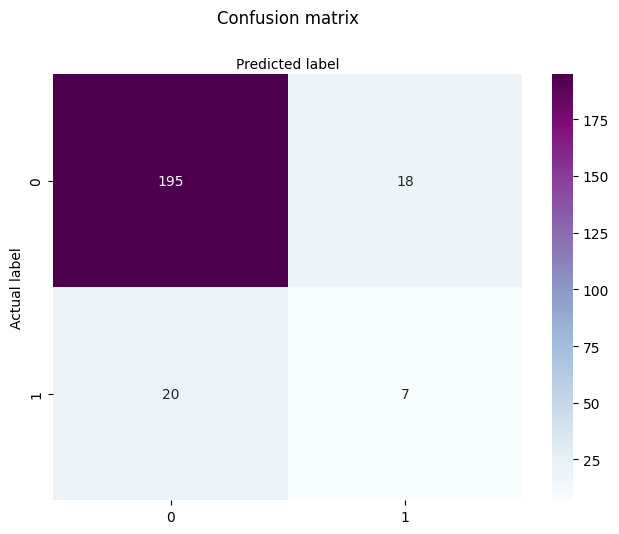

In [76]:
def plot_conf_matrix(test_label,predicted_label):
    cm = confusion_matrix(test_label,predicted_label)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');

plot_conf_matrix(y_test,y_pred)

# ***Using BERT embeddings***

In [77]:
import torch
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Example text data

def embeddings(text):
    # Tokenize the text
    tokens = tokenizer(text, return_tensors="pt")

    # Forward pass through the model to get embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Get the embeddings for the [CLS] token (usually used for classification)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # The 'embeddings' variable now contains the BERT embeddings for the input text
    return embeddings


In [78]:
demo_train2 = []
for i in X_train:
  e = embeddings(i)
  demo_train2.append(e)

In [79]:
demo_test2 = []
for i in X_test:
  e = embeddings(i)
  demo_test2.append(e)

In [80]:
# demo_val2 = []
# for i in X_val:

#   e = embeddings(i)
#   demo_val2.append(e)
print()

# ***SVC***

In [81]:
from sklearn.svm import SVC
#creating obj of model
model_svm = SVC(kernel='rbf')

In [82]:
#model training svm
model_svm.fit(demo_train2,y_train)

SVC()

In [83]:
pred_svm = model_svm.predict(demo_test2)
for i in range(len(pred_svm)):
    if(pred_svm[i] > 0.5):
        pred_svm[i] = 1
    else:
        pred_svm[i] =0

In [84]:
accuracy_score_svm = accuracy_score(y_test,pred_svm) #svm accuracy score
print("Accuracy: ",accuracy_score_svm*100)

Accuracy:  88.75


In [85]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       213
           1       0.00      0.00      0.00        27

    accuracy                           0.89       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.79      0.89      0.83       240



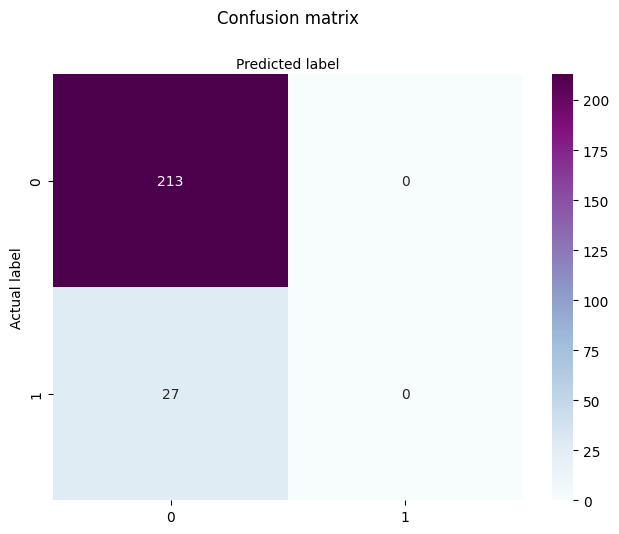

In [86]:
plot_conf_matrix(y_test,pred_svm)

# ***Logistic Regression***

In [87]:
from sklearn.linear_model import LogisticRegression
X = demo_train2
y = y_train

clf = LogisticRegression(max_iter=9000,random_state=0).fit(X, y)

In [88]:
pred_logistic = clf.predict(demo_test2)
for i in range(len(pred_logistic)):
    if(pred_logistic[i] > 0.5):
        pred_logistic[i] = 1
    else:
        pred_logistic[i] =0

In [89]:
print(classification_report(y_test,pred_logistic))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       213
           1       0.62      0.30      0.40        27

    accuracy                           0.90       240
   macro avg       0.77      0.64      0.67       240
weighted avg       0.88      0.90      0.88       240



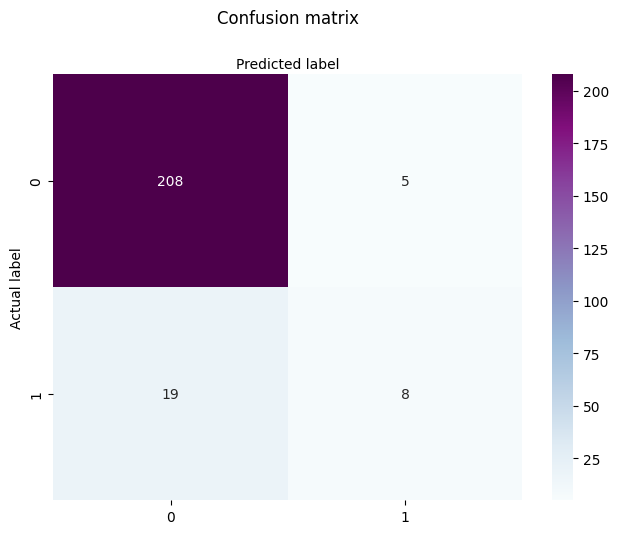

In [90]:
plot_conf_matrix(y_test,pred_logistic)

***Subtask-C***

In [91]:
#creating labelEncoder
encoder = LabelEncoder()
# Converting string labels into numbers.
# train_c["class_c_code"] = encoder.fit_transform(train_c["class_c"])
# train_c_new["class_c_code"] = encoder.fit_transform(train_c_new["class_c"])
# test_c["class_c_code"] = encoder.fit_transform(test_c["class_c"])
train_task_c_data["class_c_code"] = encoder.fit_transform(train_task_c_data["class_c"])
test_tweet_c["class_c_code"] = encoder.fit_transform(test_tweet_c["class_c"])

In [92]:
train_task_c_data['class-tuple'] = train_task_c_data[['class_c', 'class_c_code']].apply(tuple, axis=1)
class_c = train_task_c_data['class-tuple'].unique()
class_c

array([('IND', 1), ('OTH', 2), ('GRP', 0)], dtype=object)

In [93]:
train_tweets = train_task_c_data['tweet']
train_labels = train_task_c_data['class_c_code']

X_test = test_tweet_c['tweet']
y_test = test_tweet_c['class_c_code']


print("Shape of train_tweet is {} and shape of train_label is {}".format(train_tweets.shape, train_labels.shape))
print("Shape of test_tweet is {} and shape of test_label is {}".format(X_test.shape, y_test.shape))

Shape of train_tweet is (3869,) and shape of train_label is (3869,)
Shape of test_tweet is (213,) and shape of test_label is (213,)


In [94]:
X_train,X_val,y_train,y_val = train_test_split(train_tweets,train_labels,test_size=0.30,random_state=42)


print("Shape of test_tweets is {} and shape of test_labels is {}".format(X_test.shape, y_test.shape))

Shape of test_tweets is (213,) and shape of test_labels is (213,)


In [95]:
# TOKENIZER
max_features = 10000
embedding_dim = 128
max_len=500

tokenizer=Tokenizer(num_words=max_features,oov_token='</OOV>')
tokenizer.fit_on_texts(X_train.values)
dic=tokenizer.word_index


In [96]:
# TRAIN
X_train_seq = tokenizer.texts_to_sequences(X_train.values)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)

print("train data tensor:" ,X_train_pad.shape)

train data tensor: (2708, 500)


In [97]:
# VAL
X_val_seq = tokenizer.texts_to_sequences(X_val.values)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

print("test data tensor:" ,X_val_pad.shape)

test data tensor: (1161, 500)


In [98]:
# TEST
X_test_seq = tokenizer.texts_to_sequences(X_test.values)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

print("test data tensor:" ,X_test_pad.shape)

test data tensor: (213, 500)


In [99]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

In [100]:
model= Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=max_len))
model.add(Bidirectional(LSTM(128, dropout=0.3)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainable params: 1,576,193
Non-trainable params: 0
____________________________________________

In [102]:
import tensorflow as tf
METRICS = [tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")]


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=METRICS)

In [103]:
epochs = 10

# Fit the model using the train and test datasets.
history = model.fit(X_train_pad,y_train,validation_data=(X_val_pad,y_val), epochs=epochs)

Epoch 1/10
85/85 [==============================] - 20s 185ms/step - loss: 0.4915 - binary_accuracy: 0.6100 - precision: 0.7161 - recall: 0.9948 - val_loss: 0.3968 - val_binary_accuracy: 0.6451 - val_precision: 0.7416 - val_recall: 1.0000
Epoch 2/10
85/85 [==============================] - 10s 120ms/step - loss: 0.2992 - binary_accuracy: 0.6758 - precision: 0.7821 - recall: 0.9432 - val_loss: 0.3828 - val_binary_accuracy: 0.6736 - val_precision: 0.7806 - val_recall: 0.9338
Epoch 3/10
85/85 [==============================] - 6s 71ms/step - loss: -0.8076 - binary_accuracy: 0.7518 - precision: 0.8554 - recall: 0.9556 - val_loss: 1.8510 - val_binary_accuracy: 0.6090 - val_precision: 0.7791 - val_recall: 0.7863
Epoch 4/10
85/85 [==============================] - 8s 92ms/step - loss: -8.6698 - binary_accuracy: 0.7773 - precision: 0.8738 - recall: 0.9726 - val_loss: 10.1536 - val_binary_accuracy: 0.6546 - val_precision: 0.7837 - val_recall: 0.8839
Epoch 5/10
85/85 [===========================

Model image saved as 'model3.png'


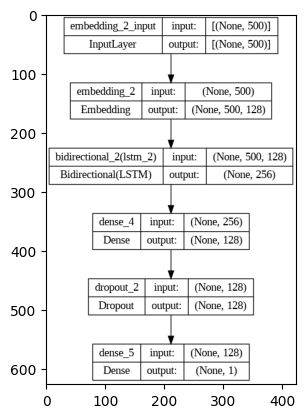

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

print("Model image saved as 'model3.png'")
img = plt.imread('/content/model_plot3.png')
plt.imshow(img)

In [105]:
scores = model.evaluate(X_test_pad, y_test, return_dict=True)

print(scores)

7/7 [==============================] - 0s 34ms/step - loss: 403.4992 - binary_accuracy: 0.5211 - precision: 0.6765 - recall: 0.8519
{'loss': 403.49920654296875, 'binary_accuracy': 0.5211267471313477, 'precision': 0.6764705777168274, 'recall': 0.8518518805503845}


In [106]:
y_pred = model.predict(X_test_pad)

7/7 [==============================] - 1s 23ms/step


In [107]:
for i in range(len(y_pred)):
    if(y_pred[i] > 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.38        78
           1       0.52      0.88      0.65       100
           2       0.00      0.00      0.00        35

    accuracy                           0.52       213
   macro avg       0.35      0.39      0.34       213
weighted avg       0.44      0.52      0.45       213



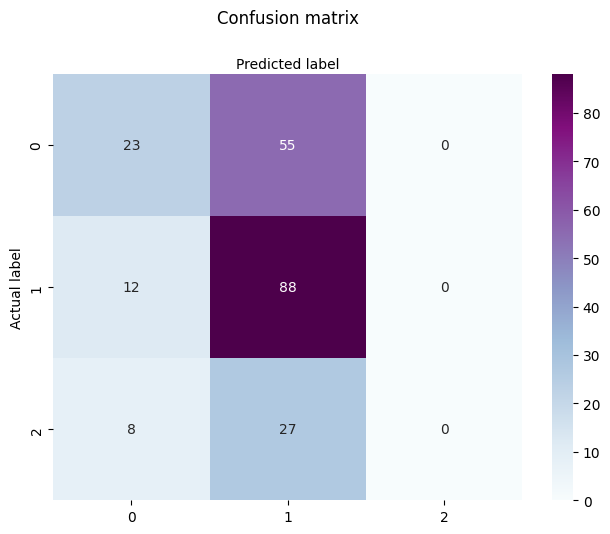

In [109]:
def plot_conf_matrix(test_label,predicted_label):
    cm = confusion_matrix(test_label,predicted_label)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');
plot_conf_matrix(y_test,y_pred)

# ***Using BERT embeddings***

In [110]:
import torch
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Example text data

def embeddings(text):
    # Tokenize the text
    tokens = tokenizer(text, return_tensors="pt")

    # Forward pass through the model to get embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Get the embeddings for the [CLS] token (usually used for classification)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # The 'embeddings' variable now contains the BERT embeddings for the input text
    return embeddings


In [111]:
demo_train3 = []
for i in X_train:
  e = embeddings(i)
  demo_train3.append(e)

In [112]:
demo_test3 = []
for i in X_test:
  e = embeddings(i)
  demo_test3.append(e)

In [119]:
print(len(X_test))

213


In [114]:
# demo_val3 = []
# for i in X_val:

#   e = embeddings(i)
#   demo_val.append(e)
print()

# ***SVC***

In [121]:
from sklearn.svm import SVC
#creating obj of model
model_svm = SVC(kernel='rbf')

In [122]:
#model training svm
model_svm.fit(demo_train3,y_train)

SVC()

In [123]:
pred_svm = model_svm.predict(demo_test3)

In [124]:
for i in range(len(pred_svm)):
    if(pred_svm[i] > 0.5):
        pred_svm[i] = 1
    else:
        pred_svm[i] =0

In [125]:
accuracy_score_svm = accuracy_score(y_test,pred_svm) #svm accuracy score
print("Accuracy: ",accuracy_score_svm*100)

Accuracy:  70.89201877934272


In [126]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        78
           1       0.72      0.95      0.82       100
           2       0.00      0.00      0.00        35

    accuracy                           0.71       213
   macro avg       0.47      0.56      0.51       213
weighted avg       0.59      0.71      0.64       213



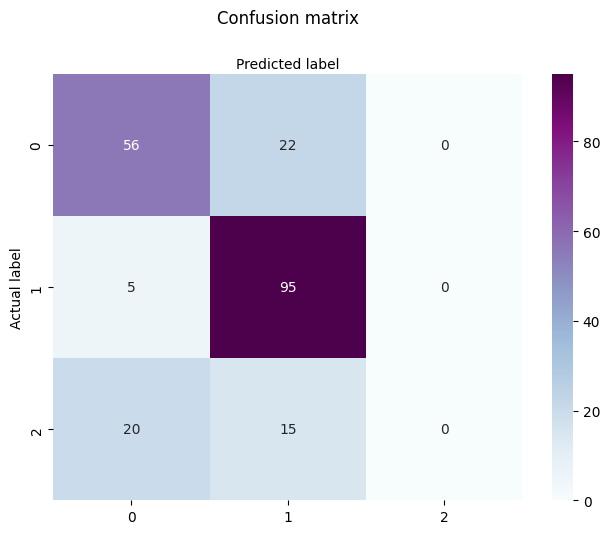

In [127]:
plot_conf_matrix(y_test,pred_svm)

# ***Logistic Regression***

In [128]:
from sklearn.linear_model import LogisticRegression
X = demo_train3
y = y_train

clf = LogisticRegression(max_iter=9000,random_state=0).fit(X, y.ravel())

In [129]:
pred_logistic = clf.predict(demo_test3)

In [130]:
for i in range(len(pred_logistic)):
    if(pred_logistic[i] > 0.5):
        pred_logistic[i] = 1
    else:
        pred_logistic[i] =0

In [131]:
print(classification_report(y_test,pred_logistic))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69        78
           1       0.66      0.93      0.77       100
           2       0.00      0.00      0.00        35

    accuracy                           0.68       213
   macro avg       0.46      0.53      0.49       213
weighted avg       0.57      0.68      0.62       213



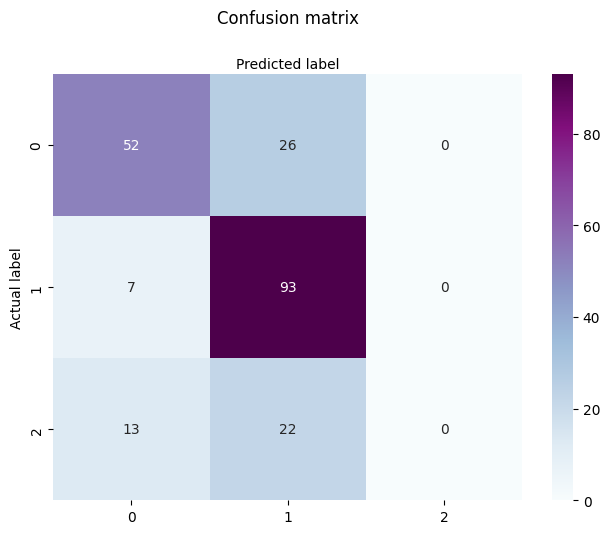

In [132]:
plot_conf_matrix(y_test,pred_logistic)